In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  
import torch.nn as nn
import torch 
import skimage as sk
import skimage.io as skio
import torchvision.datasets as datasets
from preprocess import mean, std, preprocess_input_function
from settings import train_dir, test_dir, train_push_dir, train_batch_size, test_batch_size, train_push_batch_size
from settings import base_architecture, img_size, prototype_shape, num_classes, prototype_activation_function, add_on_layers_type
from receptive_field import compute_rf_prototype
import cv2
from reward_model import construct_PrefNet, paired_cross_entropy_loss, PrefNet
from tqdm import tqdm
from settings import joint_optimizer_lrs, joint_lr_step_size
import skimage as sk
import skimage.io as skio
import train_and_test as tnt
import torchvision.transforms as transforms

In [75]:
def visualize_prototypes(class_id, dirs, k=3):
    num_epochs = len(dirs)
    fig, axes = plt.subplots(num_epochs, k, figsize=(10, 10))
    for i in range(num_epochs):
        for j in range(k):
            im = skio.imread('./A3C_results/'+dirs[i]+'/'+str(class_id)+'/nearest-'+str(j+1)+'_original_with_heatmap.png')
            im = sk.img_as_float(im)
            axes[i][j].imshow(im)
            #axes[i].imshow(im)

AttributeError: 'numpy.ndarray' object has no attribute 'imshow'

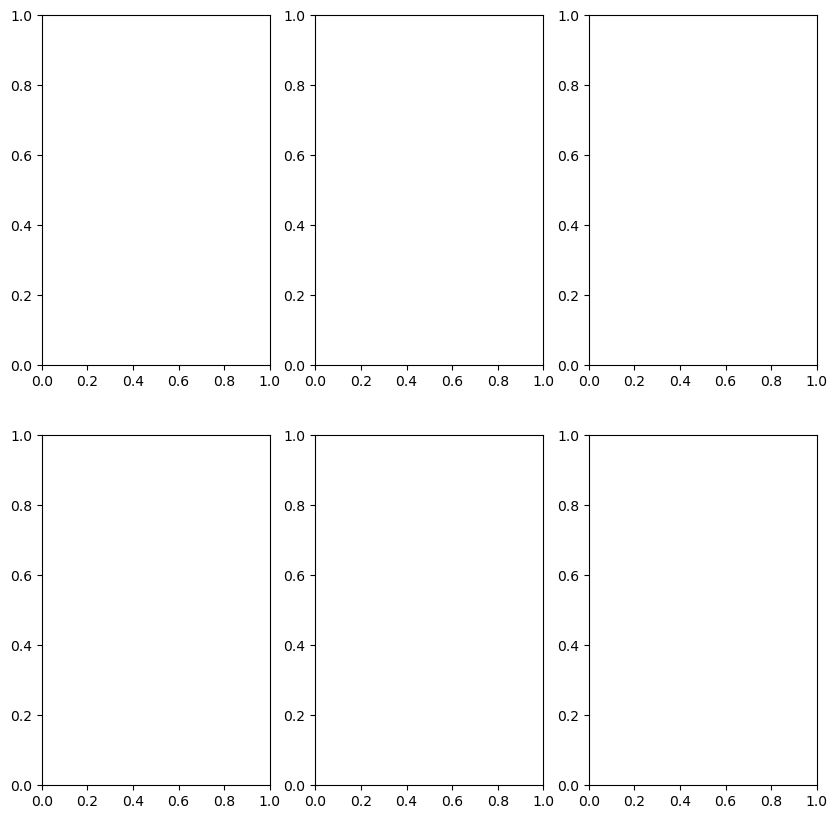

In [74]:
visualize_prototypes(60, dirs, k=3)

In [51]:
def compare_ppnets(pid, dirs):
    fig, axes = plt.subplots(len(dirs), len(pid), figsize=(10, 5))
    for i in range(len(dirs)):
        for j in range(len(pid)):
            im = skio.imread('./A3C_results/'+dirs[i]+'/'+str(pid[j])+'/nearest-1_original_with_heatmap.png')
            im = sk.img_as_float(im)
            axes[i][j].imshow(im)

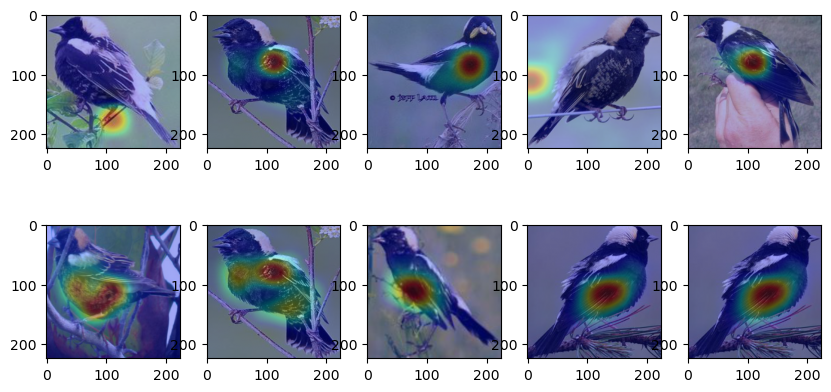

In [72]:
compare_ppnets([60, 61, 62, 63, 64], dirs)

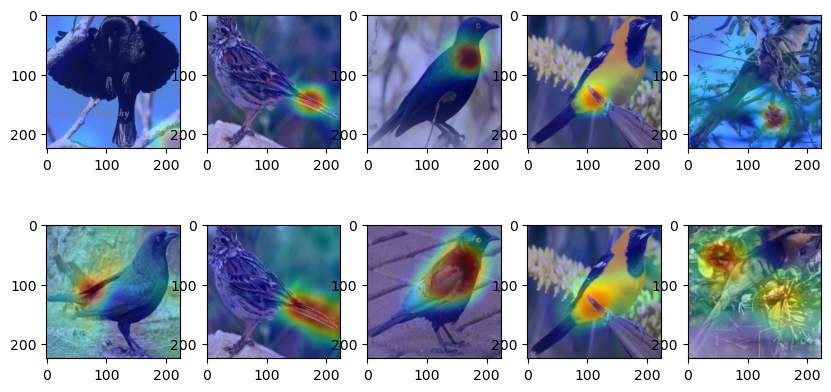

In [71]:
dirs = ['PPnet_prototypes', '005']
compare_ppnets(np.random.choice(np.arange(1000), 5), dirs)

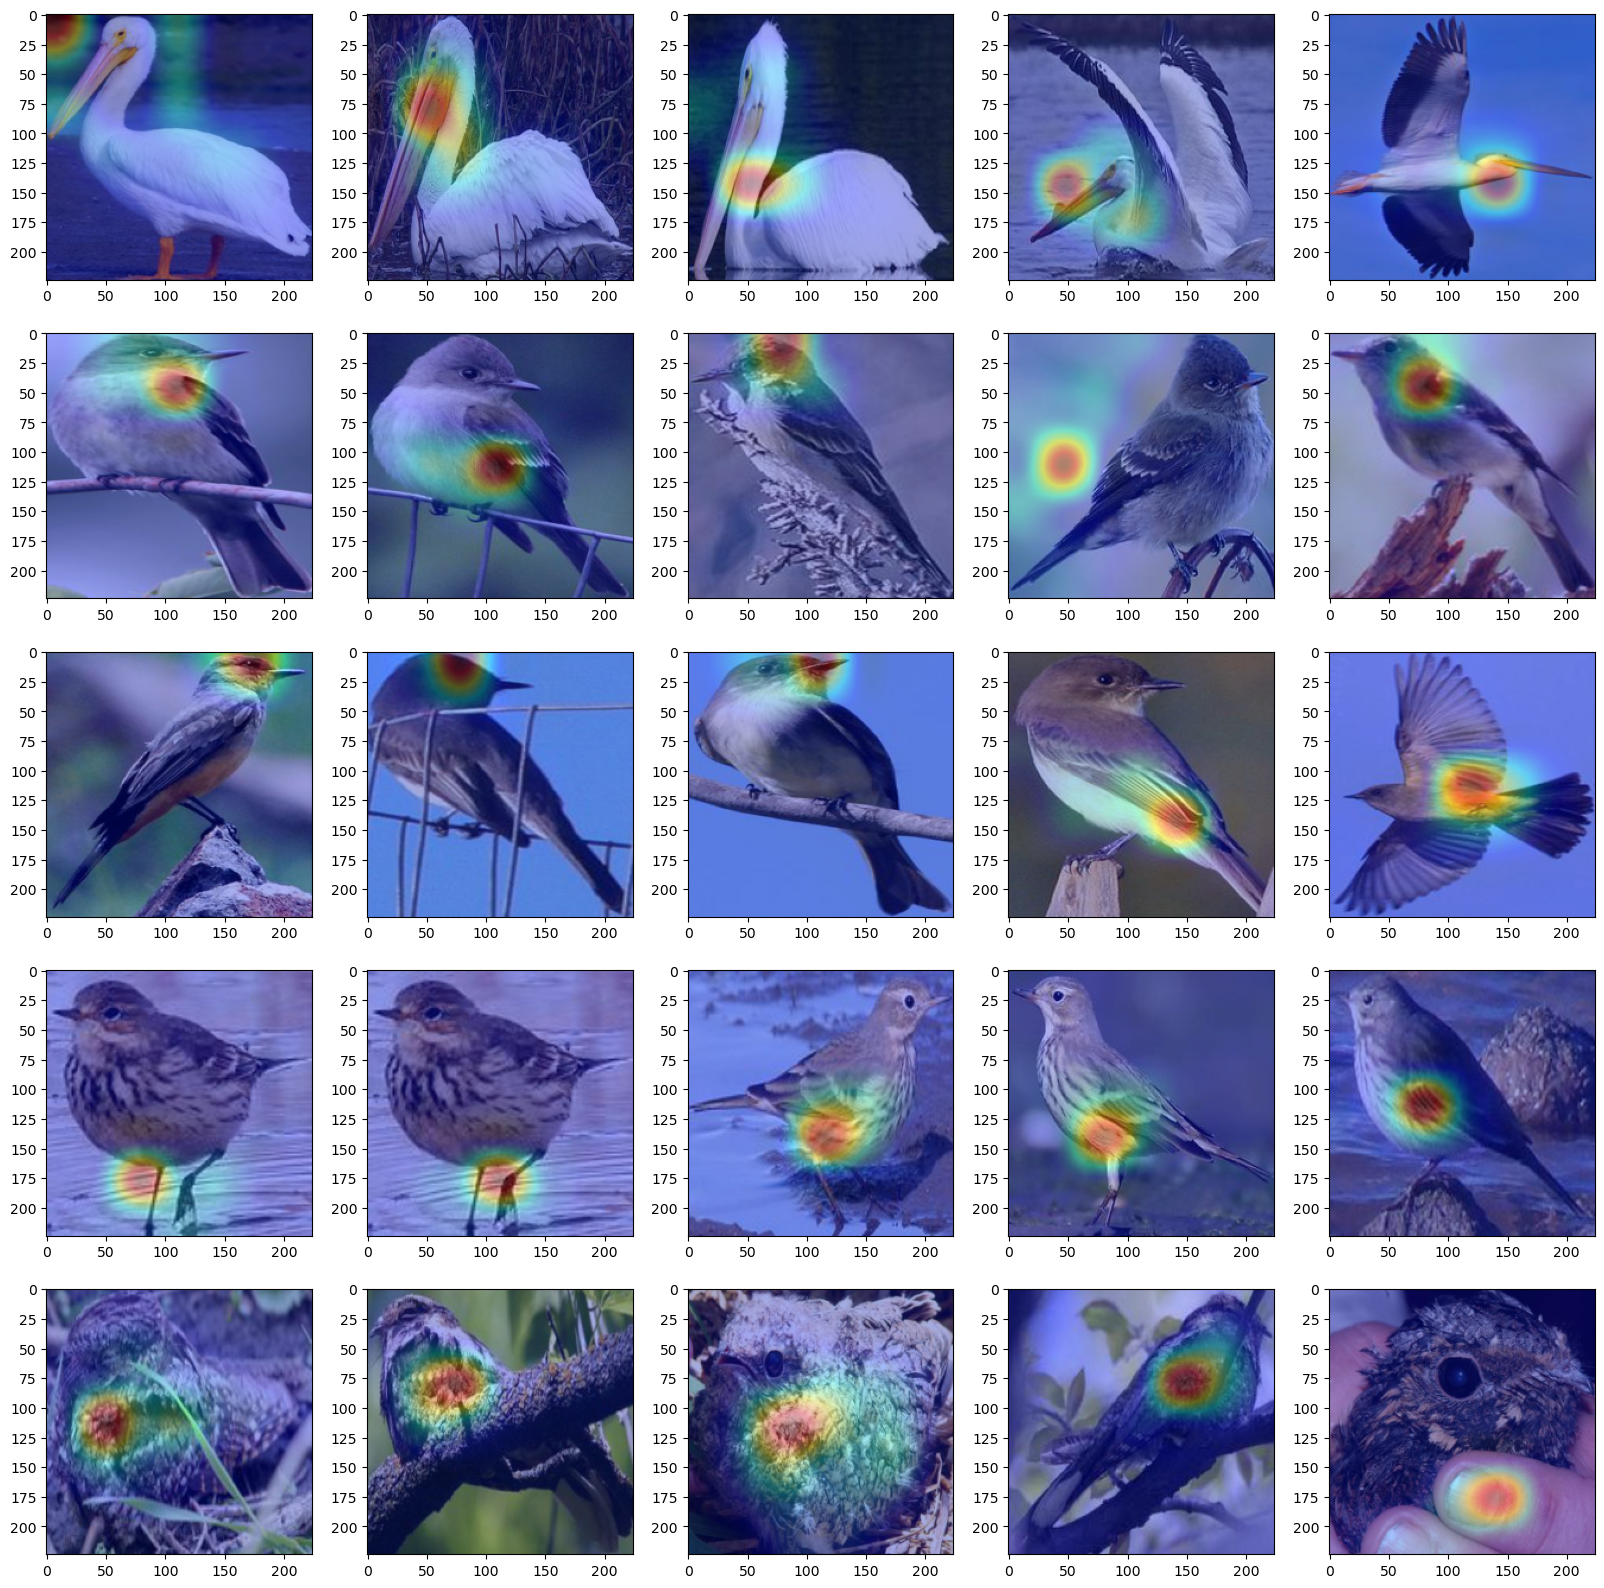

In [44]:
fig, axes = plt.subplots(5, 5, figsize=(20, 20))
for i in range(5):
    for j in range(5):
        im = skio.imread('./A3C_results/PPnet_prototypes/'+str(500+i*5+j)+'/nearest-1_original_with_heatmap.png')
        im = sk.img_as_float(im)
        axes[i][j].imshow(im)

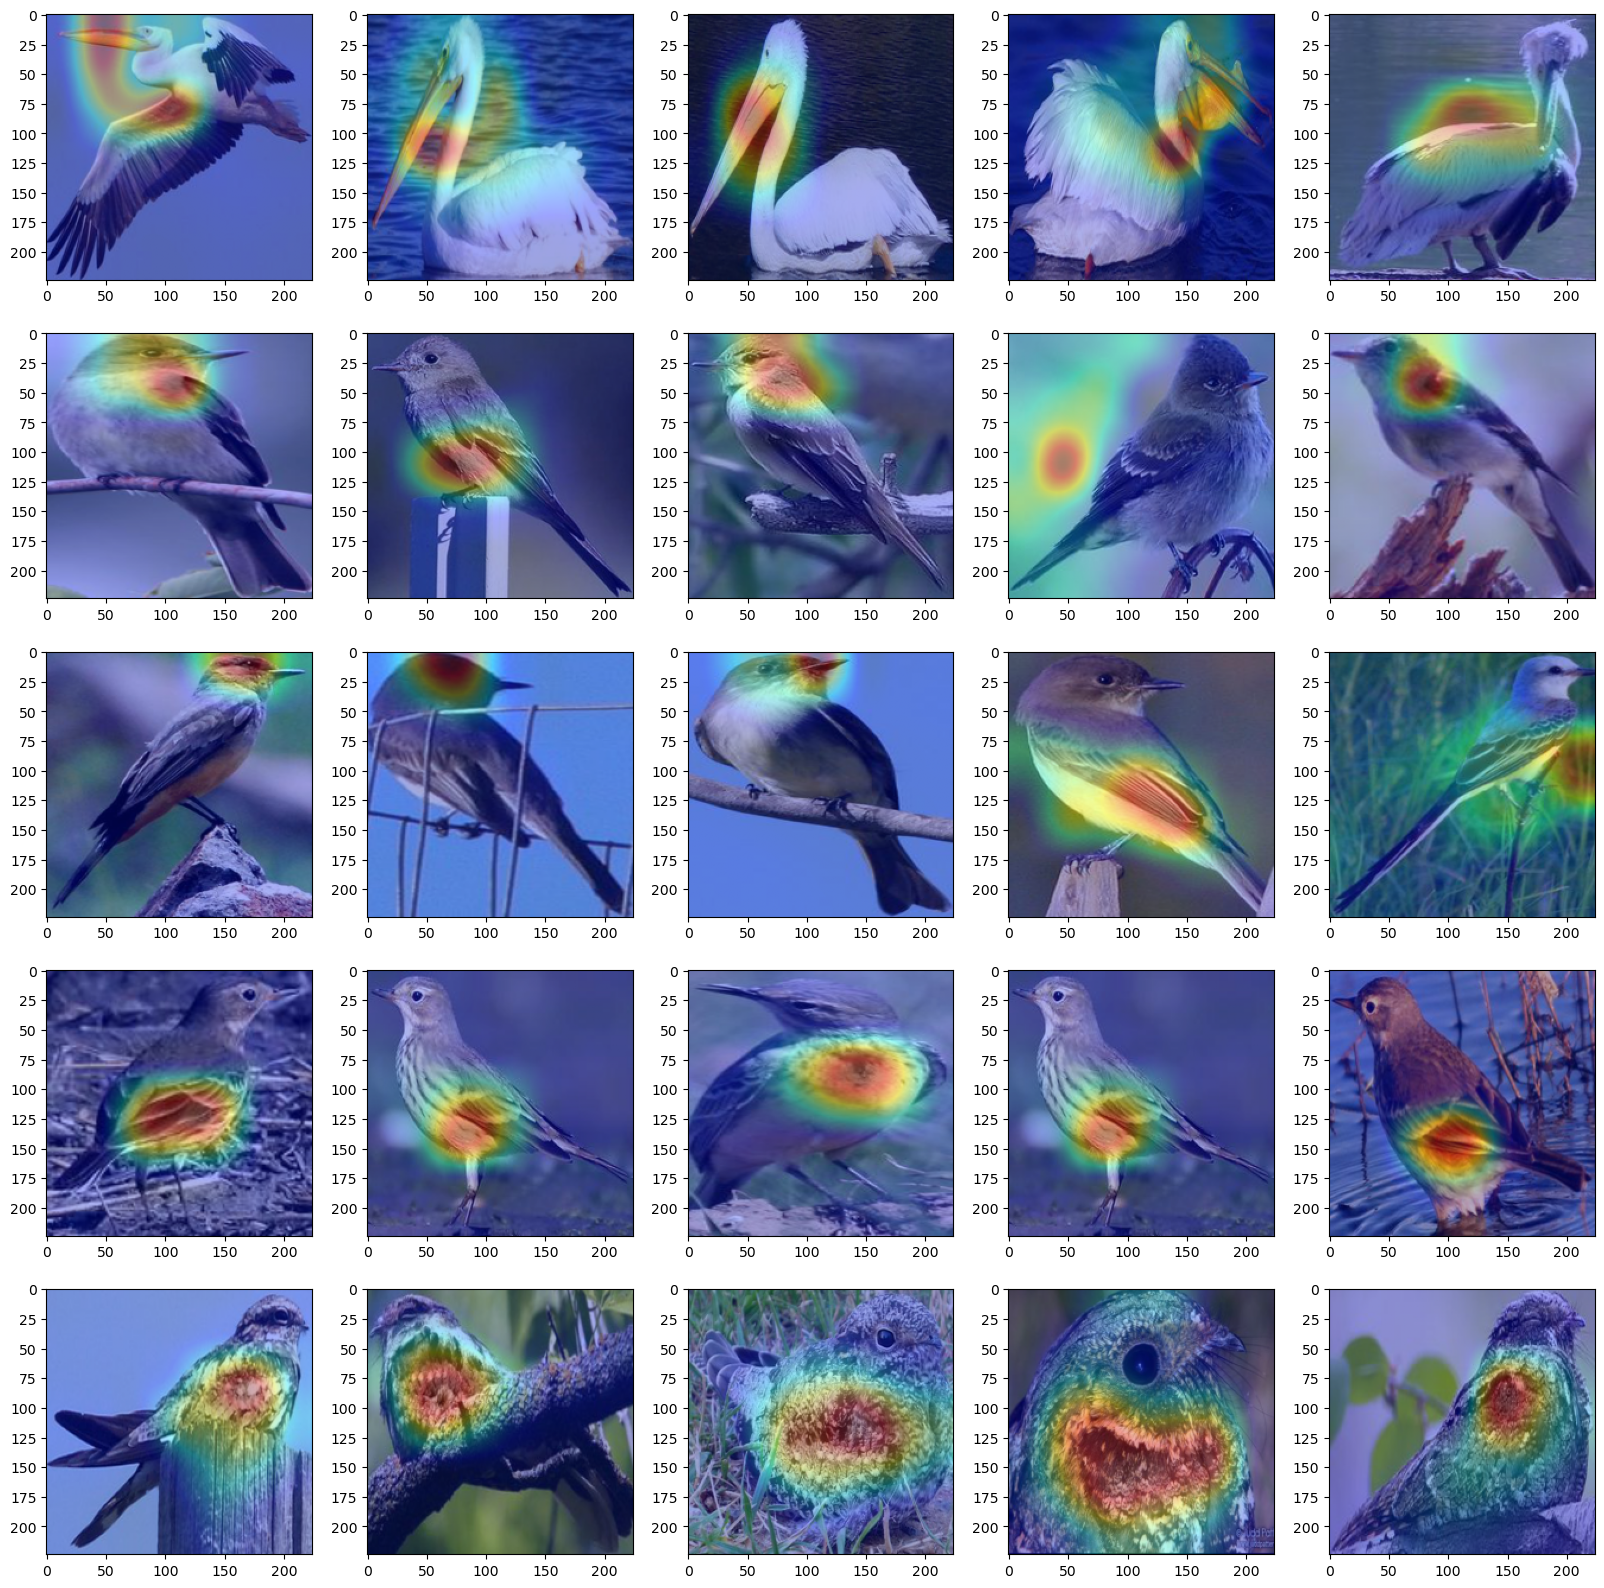

In [45]:
fig, axes = plt.subplots(5, 5, figsize=(20, 20))
for i in range(5):
    for j in range(5):
        im = skio.imread('./A3C_results/005/'+str(500+i*5+j)+'/nearest-1_original_with_heatmap.png')
        im = sk.img_as_float(im)
        axes[i][j].imshow(im)

In [28]:
normalize = transforms.Normalize(mean=mean, std=std)
test_dataset = datasets.ImageFolder(
        test_dir,
        transforms.Compose([
            transforms.Resize(size=(img_size, img_size)),
            transforms.ToTensor(),
            normalize,
        ]))
test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=test_batch_size, shuffle=False,
    num_workers=2, pin_memory=False)

In [30]:
ppnet = torch.load(r'./A3C_results/005_ppnet.pth')
acc = tnt.test(model=ppnet, dataloader=test_loader, class_specific=True, log=print)

	test


58it [00:25,  2.23it/s]


	time: 	26.17324662208557
	cross ent: 	1.2785181593278359
	cluster: 	0.059991770263375904
	separation:	0.046697023966959836
	avg separation:	1.0690980389200408
	accu: 		71.81567138419054%
	l1: 		1273.353515625
	p dist pair: 	2.382054567337036


In [31]:
ppnet_baseline = torch.load(r'../saved_models/vgg19/004/100_7push0.7344.pth')
acc = tnt.test(model=torch.nn.DataParallel(ppnet_baseline), dataloader=test_loader, class_specific=True, log=print)

	test


58it [00:19,  3.00it/s]


	time: 	19.579073429107666
	cross ent: 	1.3214225681691334
	cluster: 	0.04657414272941392
	separation:	0.03563080821186304
	avg separation:	1.021048633189037
	accu: 		73.16189161201243%
	l1: 		1273.353515625
	p dist pair: 	2.3300211429595947
